In [2]:
import os
from pyeer.eer_info import get_eer_stats
from os.path import join 
import pandas as pd
import json 
import os
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
import sys
import inspect
#from multiprocessing import Process, Queue
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns 
name_translator_dict = {
 }

In [3]:
import os
from pyeer.eer_info import get_eer_stats
from os.path import join 
import pandas as pd
import json 
import os
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
import sys
import inspect
#from multiprocessing import Process, Queue
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns 
name_translator_dict = {
 }

In [4]:
folder_of_datasets = "../../ID-Booth/FR_DATASETS"

loss_exps = ["no_new_Loss", "identity_loss_TimestepWeight", "triplet_prior_loss_TimestepWeight"]

real_folder = f"../../ID-Booth/FR_DATASETS/tufts_512_poses_1-7_all_imgs_jpg_per_ID/images"

folders_to_plot_from = ["RESULTS/vsReal", "RESULTS/vsSynth"]


# create pyeer report
report_which_metrics = [
    "eer",
    "eer_th",
    #"auc",
    "fmr100",
    "fmr1000",
    "gmean",
    "gstd",
    "imean",
    "istd",
    "fdr",
]



12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/no_new_Loss
12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/identity_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/triplet_prior_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/no_new_Loss
12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/identity_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB/triplet_prior_loss_TimestepWeight
Saving to: FIGURES_ID-Booth_12-2024/GEN_IMP_SD21_plots_onlyComplex.pdf


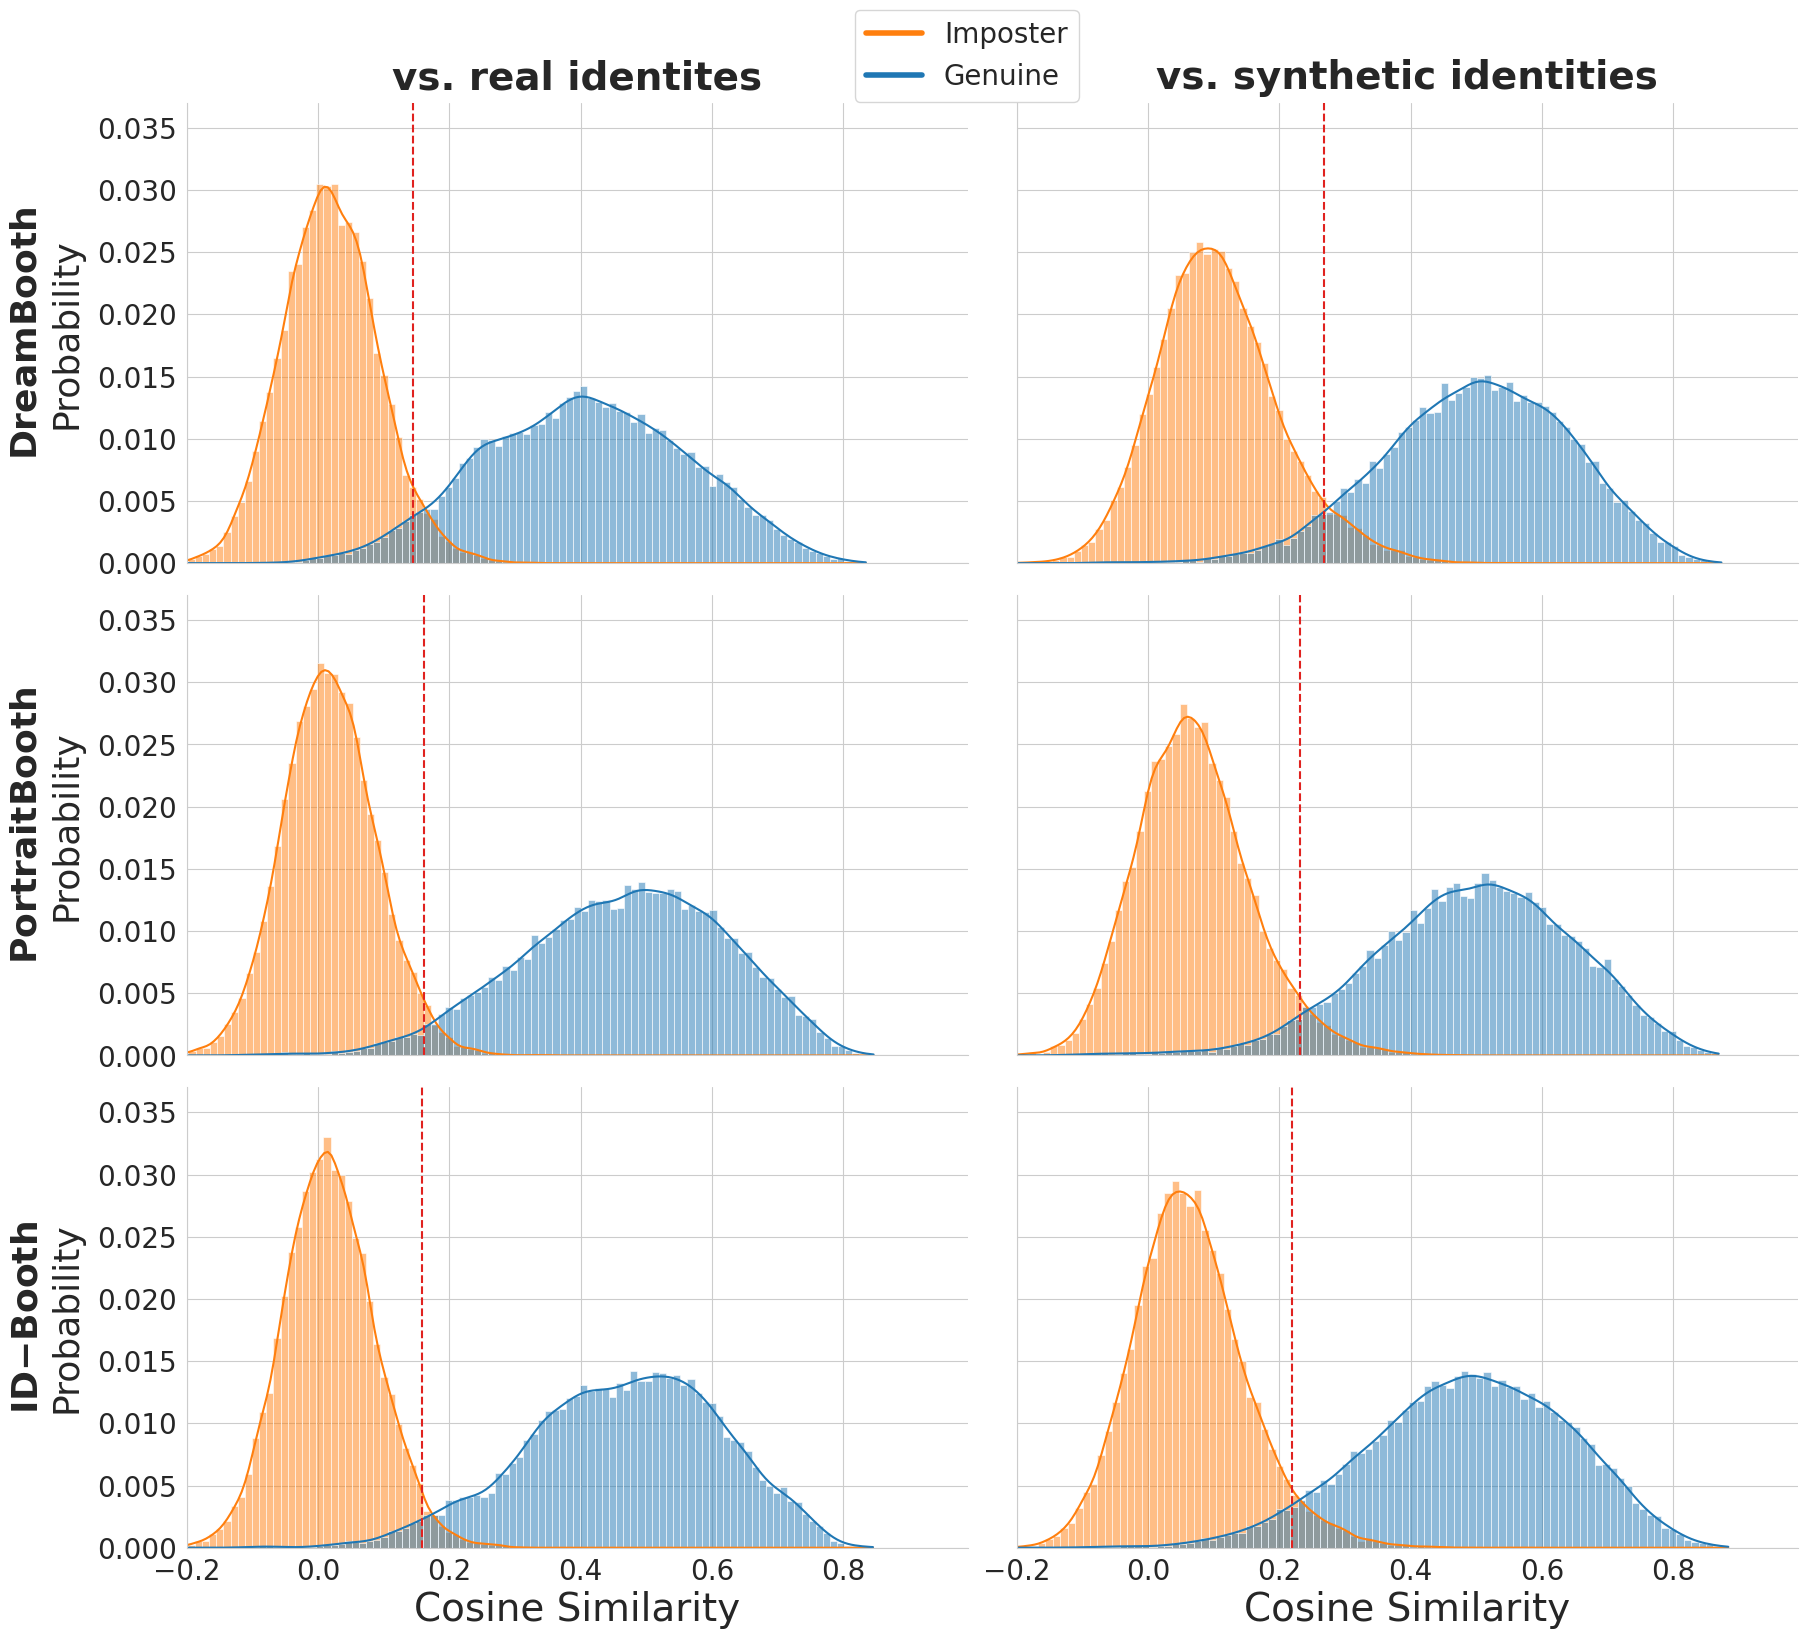

In [7]:
############################
# create figures with only nice distribution plots first
def plot_score_histogram(ax, df, name, stats, loss_add, which_stat, plot_y, plot_top_x, plot_bot_x):
    TU_DESIGN_COLORS = {'Genuine': "#64a0d9", 'Imposter': "#d99d64", 'random': "#721085", 'eer': "#E0221F"}
    
    sns.set_style("whitegrid")
    sns.despine(right=True)
    ax = sns.histplot(ax=ax, data=df, x="scores", hue="label", alpha=0.5, stat=which_stat, kde=True, bins=100) 

    ax.tick_params(axis='both', which='major', labelsize=font_size-4)
    ax.axvline(x=stats["eer_th"], c=TU_DESIGN_COLORS['eer'], linestyle="--")

    labels = [f'Genuine', f'Imposter'] 
    handles = [mpatches.Patch(color=TU_DESIGN_COLORS[label], label=label) for label in labels]

    genuine_info = f"${round(stats['gmean'], 3)} \pm {round(stats['gstd'], 3)}$" 
    imposter_info = f"${round(stats['imean'], 3)} \pm {round(stats['istd'], 3)}$"
    
    labels = [f'Genuine ({genuine_info})', f'Imposter ({imposter_info})']     
    ax.legend(handles=handles, labels=labels, loc="upper left", title="")

    loss_add = ""
    if "no_new" in loss_exp: loss_add = "DreamBooth"
    if "identity_loss" in loss_exp: loss_add = "PortraitBooth"
    if "triplet_prior_loss" in loss_exp: loss_add = "ID\t{-}Booth"

    if plot_y:
        ax.set_ylabel("$\\bf{" + f"{loss_add}" + "}$\nProbability", size=font_size + 2 ,labelpad=10)#, usetex=True)#, fontweight="bold")
    else: 
        ax.set_ylabel('')
        ax.set_yticklabels([])

    #if plot_top_x: ax.set_title(name_translator_dict[name.replace("/", "__")], size=font_size + 4, fontweight="bold", pad=10)
    if plot_top_x: ax.set_title(name, size=font_size + 4, fontweight="bold", pad=10)
    if plot_bot_x: ax.set_xlabel("Cosine Similarity", size=font_size + 4)#, fontweight="bold")
    else: 
       ax.set_xlabel('')
       ax.set_xticklabels([])
    
    ax.get_legend().remove()
    ax.set_ylim(0, 0.037)#0.042) # 24 #0.047)
    ax.set_xlim(-0.2, 0.99)
    
############################

font_size = 24 # 16
fig = plt.figure(figsize=(18, 16)) # TODO 12
#fig, axs = plt.subplots(ncols=4*2, nrows=3, figsize=(32, 12))#figsize=(16,8))#, figsize=(16,16))
axarr1 = fig.subplots(nrows=3, ncols=2)#, gridspec_kw=dict(left=0, right=0.47, wspace=0.1, hspace=0.1))
#axarr2 = fig.subplots(nrows=3, ncols=1, gridspec_kw=dict(left=0.5, right=1.00, wspace=0.1, hspace=0.1))

name_translator_dict = dict()


synth_folders = [#"12-2024_SD21_LoRA4_alphaW0.1_Face",  
                # TODO "12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments"
                #"12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB"
                #"12-2024_SD21_LoRA4_alphaW0.1_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB"
                "12-2024_SD21_LoRA4_alphaWNone_FINAL_FacePortraitPhoto_Gender_Pose_BackgroundB"]


for synth_fold in synth_folders: 
    for loss_exp in loss_exps: 
        add = ""
        if "base" in synth_fold: add = "Base"
        if "combined" in synth_fold: add = "Complex"
        
        loss_add = ""
        if "no_new" in loss_exp: loss_add = "DreamBooth"
        if "identity_loss" in loss_exp: loss_add = "PortraitBooth"
        if "triplet_prior_loss" in loss_exp: loss_add = "ID-Booth"

        name =  synth_fold.split('_')[0]
        
        if name == "SD21": name = "SD-2.1"
        if name == "SDXL": name = "SD-XL"
        new_name = f"{name} ({add})" # {loss_add}"
        name_translator_dict[f"{synth_fold}__{loss_exp}"] = new_name 


subtitles = ["vs. real identites", "vs. synthetic identities"]

# sub_axs = [axarr1, axarr2] 
for p, plot_from in enumerate(folders_to_plot_from):
    axs = axarr1
    for i, synth_fold in enumerate(synth_folders):
        for j, loss_exp in enumerate(loss_exps):
            folder = os.path.join(synth_fold, loss_exp)
            print(folder)

            df_path = os.path.join(plot_from, folder, "final_df.csv")
            df = pd.read_csv(df_path)
        
            stats = None 
            with open(os.path.join(plot_from, folder, "PyEER_report.json"), "r") as outfile: #_" + subfolder.replace("/", "__"))+".json", "w") as outfile:
                stats = json.load(outfile)
                #print("==" * 30)

            plot_y = False 
            plot_bot_x = False 
            plot_top_x = False
            
            #nu_i = i +  p * 4

            if i == 0 and p == 0: plot_y = True 
            if j == 0: plot_top_x = True
            if j == len(loss_exps)-1: plot_bot_x = True  
         
            plot_score_histogram(axs[j][p], df, subtitles[p], stats, loss_exp, which_stat="probability", plot_y=plot_y, plot_top_x=plot_top_x, plot_bot_x = plot_bot_x)
            

#plt.legend(loc="lower right")

labels = ["Imposter", "Genuine"]
#leg = fig.legend(labels=labels,  loc='upper center', ncol=2,bbox_to_anchor=(0.485, 0.98), prop={'size': 20}) #bbox_to_anchor=(0.1, 1.05), prop={'size': 20})
leg = fig.legend(labels=labels,  loc='upper center', ncol=1, bbox_to_anchor=(0.53, 1.03), prop={'size': 20}) #bbox_to_anchor=(0.1, 1.05), prop={'size': 20})

# set the linewidth of each legend object

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

#bbox_to_anchor=(0.52, 1.03), prop={'size': 20})
#line = plt.Line2D((.5,.5),(.1,.9), color="k", linewidth=3)
#fig.add_artist(line)

plt.tight_layout()
# subtitle_height = 0.124
#plt.text(-0.75, subtitle_height, "vs. synthetic identities", fontsize=28, fontweight="bold")
#plt.text(-3.25, subtitle_height, "vs. real identities", fontsize=28, fontweight="bold")

output_dir = "FIGURES_ID-Booth_12-2024"
os.makedirs(output_dir, exist_ok=True)
savename = os.path.join(output_dir, "GEN_IMP_SD21_plots_onlyComplex.pdf")#"gen_imp__" + name_translator_dict[subfolder].replace("/", "__") + ".png")
print("Saving to:", savename)
#plt.savefig(savename, dpi=500, bbox_inches='tight')



12-2024_SD21_LoRA4_alphaW0.1_Face/no_new_Loss
12-2024_SD21_LoRA4_alphaW0.1_Face/identity_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaW0.1_Face/triplet_prior_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments/no_new_Loss
12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments/identity_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments/triplet_prior_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaW0.1_Face/no_new_Loss
12-2024_SD21_LoRA4_alphaW0.1_Face/identity_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaW0.1_Face/triplet_prior_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments/no_new_Loss
12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments/identity_loss_TimestepWeight
12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments/triplet_prior_loss_TimestepWeight
Saving to: FIGURES_ID-Booth_12-2024/GEN_IMP_plots.pdf


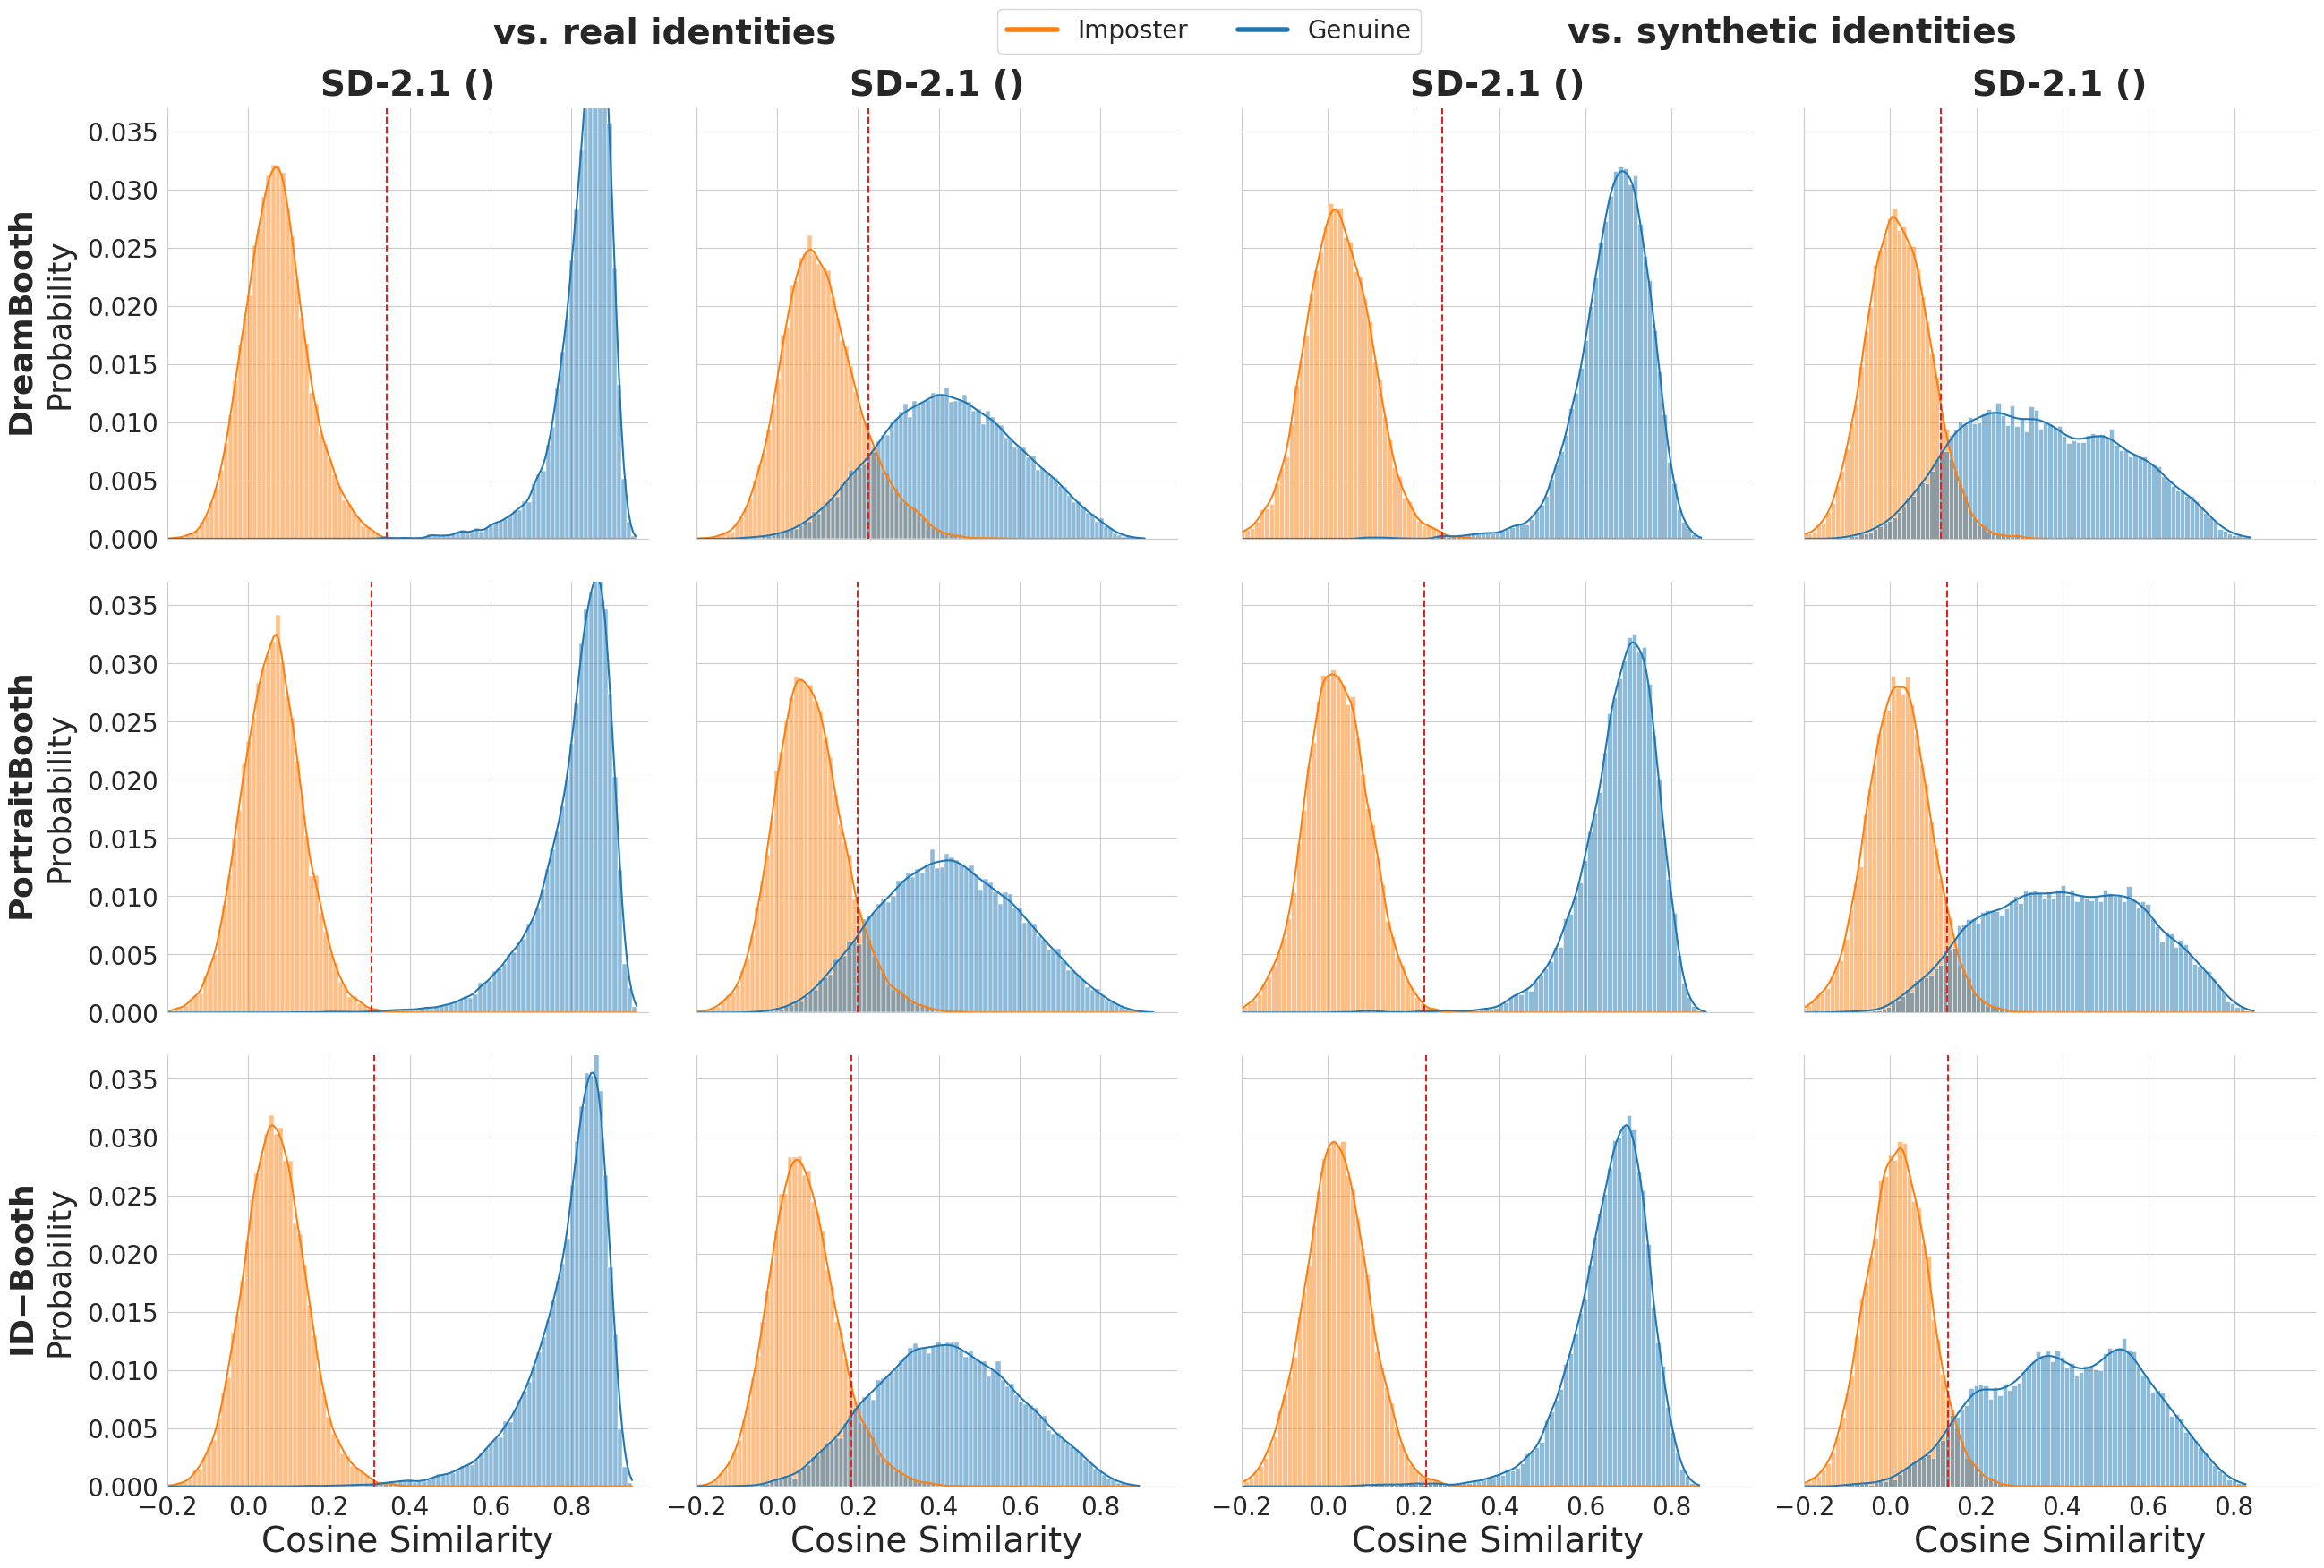

In [22]:

############################
# create figures with only nice distribution plots first
def plot_score_histogram(ax, df, name, stats, loss_add, which_stat, plot_y, plot_top_x, plot_bot_x):
    TU_DESIGN_COLORS = {'Genuine': "#64a0d9", 'Imposter': "#d99d64", 'random': "#721085", 'eer': "#E0221F"}
    
    sns.set_style("whitegrid")
    sns.despine(right=True)
    ax = sns.histplot(ax=ax, data=df, x="scores", hue="label", alpha=0.5, stat=which_stat, kde=True, bins=100) 

    ax.tick_params(axis='both', which='major', labelsize=font_size-4)
    ax.axvline(x=stats["eer_th"], c=TU_DESIGN_COLORS['eer'], linestyle="--")

    labels = [f'Genuine', f'Imposter'] 
    handles = [mpatches.Patch(color=TU_DESIGN_COLORS[label], label=label) for label in labels]

    genuine_info = f"${round(stats['gmean'], 3)} \pm {round(stats['gstd'], 3)}$" 
    imposter_info = f"${round(stats['imean'], 3)} \pm {round(stats['istd'], 3)}$"
    
    labels = [f'Genuine ({genuine_info})', f'Imposter ({imposter_info})']     
    ax.legend(handles=handles, labels=labels, loc="upper left", title="")

    loss_add = ""
    if "no_new" in loss_exp: loss_add = "DreamBooth"
    if "identity_loss" in loss_exp: loss_add = "PortraitBooth"
    if "triplet_prior_loss" in loss_exp: loss_add = "ID\t{-}Booth"

    if plot_y:
        ax.set_ylabel("$\\bf{" + f"{loss_add}" + "}$\nProbability", size=font_size + 2 ,labelpad=10)#, usetex=True)#, fontweight="bold")
    else: 
        ax.set_ylabel('')
        ax.set_yticklabels([])

    if plot_top_x: ax.set_title(name_translator_dict[name.replace("/", "__")], size=font_size + 4, fontweight="bold", pad=10)
    if plot_bot_x: ax.set_xlabel("Cosine Similarity", size=font_size + 4)#, fontweight="bold")
    else: 
       ax.set_xlabel('')
       ax.set_xticklabels([])
    
    ax.get_legend().remove()
    ax.set_ylim(0, 0.037)#0.042) # 24 #0.047)
    ax.set_xlim(-0.2, 0.99)
    
############################

# folders_to_plot_from = ["Combined_Dreambooth_Consistency", "Combined_Dreambooth"]
folders_to_plot_from = ["RESULTS/vsSynth","RESULTS/vsReal"]

font_size = 24 # 16
fig = plt.figure(figsize=(24, 20)) # TODO 12
#fig, axs = plt.subplots(ncols=4*2, nrows=3, figsize=(32, 12))#figsize=(16,8))#, figsize=(16,16))
axarr1 = fig.subplots(nrows=3, ncols=2, gridspec_kw=dict(left=0, right=0.47, wspace=0.1, hspace=0.1))
axarr2 = fig.subplots(nrows=3, ncols=2, gridspec_kw=dict(left=0.5, right=1.00, wspace=0.1, hspace=0.1))

name_translator_dict = dict()

for synth_fold in synth_folders: 
    for loss_exp in loss_exps: 
        add = ""
        if "base" in synth_fold: add = "Base"
        if "combined" in synth_fold: add = "Complex"
        
        loss_add = ""
        if "no_new" in loss_exp: loss_add = "DreamBooth"
        if "identity_loss" in loss_exp: loss_add = "PortraitBooth"
        if "triplet_prior_loss" in loss_exp: loss_add = "ID-Booth"

        name =  synth_fold.split('_')[1]
        
        if name == "SD21": name = "SD-2.1"
        if name == "SDXL": name = "SD-XL"
        new_name = f"{name} ({add})" # {loss_add}"
        name_translator_dict[f"{synth_fold}__{loss_exp}"] = new_name 


#subtitles = ["vs. real identites", "vs. synthetic identities"]

synth_folders = ["12-2024_SD21_LoRA4_alphaW0.1_Face",  
                "12-2024_SD21_LoRA4_alphaW0.1_Face_Poses_Environments"
                ]

sub_axs = [axarr1, axarr2] 
for p, plot_from in enumerate(folders_to_plot_from):
    axs = sub_axs[p]
    for i, synth_fold in enumerate(synth_folders):
        for j, loss_exp in enumerate(loss_exps):
            folder = os.path.join(synth_fold, loss_exp)
            print(folder)

            df_path = os.path.join(plot_from, folder, "final_df.csv")
            df = pd.read_csv(df_path)
        
            stats = None 
            with open(os.path.join(plot_from, folder, "PyEER_report.json"), "r") as outfile: #_" + subfolder.replace("/", "__"))+".json", "w") as outfile:
                stats = json.load(outfile)
                #print("==" * 30)

            plot_y = False 
            plot_bot_x = False 
            plot_top_x = False
            
            #nu_i = i +  p * 4

            if i == 0 and p == 0: plot_y = True 
            if j == 0: plot_top_x = True
            if j == len(loss_exps)-1: plot_bot_x = True  
         
            plot_score_histogram(axs[j][i], df, folder, stats, loss_exp, which_stat="probability", plot_y=plot_y, plot_top_x=plot_top_x, plot_bot_x = plot_bot_x)
            

#plt.legend(loc="lower right")

labels = ["Imposter", "Genuine"]
#leg = fig.legend(labels=labels,  loc='upper center', ncol=2,bbox_to_anchor=(0.485, 0.98), prop={'size': 20}) #bbox_to_anchor=(0.1, 1.05), prop={'size': 20})
leg = fig.legend(labels=labels,  loc='upper center', ncol=2,bbox_to_anchor=(0.485, 0.9425), prop={'size': 20}) #bbox_to_anchor=(0.1, 1.05), prop={'size': 20})

# set the linewidth of each legend object

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4.0)

#bbox_to_anchor=(0.52, 1.03), prop={'size': 20})
#line = plt.Line2D((.5,.5),(.1,.9), color="k", linewidth=3)
#fig.add_artist(line)

#plt.tight_layout()
subtitle_height = 0.124
plt.text(-0.75, subtitle_height, "vs. synthetic identities", fontsize=28, fontweight="bold")
plt.text(-3.25, subtitle_height, "vs. real identities", fontsize=28, fontweight="bold")

output_dir = "FIGURES_ID-Booth_12-2024"
os.makedirs(output_dir, exist_ok=True)
savename = os.path.join(output_dir, "GEN_IMP_plots.pdf")#"gen_imp__" + name_translator_dict[subfolder].replace("/", "__") + ".png")
print("Saving to:", savename)
plt.savefig(savename, dpi=500, bbox_inches='tight')

